<a href="https://colab.research.google.com/github/sugi-san/anime/blob/master/anime_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title 1.マシンにソフトをインストール
from IPython.utils import io
import os
import subprocess
import tqdm.notebook
TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'
try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
         # githubからコードを取得
         %tensorflow_version 1.x
         !git clone https://github.com/sugi-san/anime.git
         %cd anime
         pbar.update(100)
except subprocess.CalledProcessError:
  print(captured)
  raise

# imagesフォルダーを作成
import os
os.makedirs('images', exist_ok=True)

# 画像の表示関数
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

def display_pic(folder):
    fig = plt.figure(figsize=(30, 40))
    files = os.listdir(folder)
    files.sort()
    for i, file in enumerate(files):
        img = Image.open(folder+'/'+file)    
        images = np.asarray(img)
        ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
        image_plt = np.array(images)
        ax.imshow(image_plt)
        ax.set_xlabel(file, fontsize=15)               
    plt.show()
    plt.close()

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

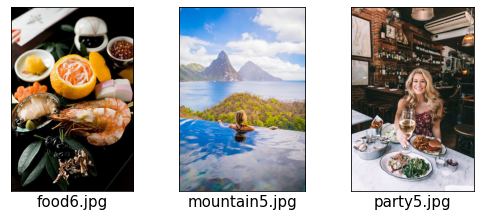

In [2]:
#@title 2.サンプル画像表示
display_pic('samples')

In [3]:
#@title 3.画像をアニメに変換
import shutil
sample = 'party5.jpg' #@param ["food6.jpg", "mountain5.jpg", "party5.jpg"] {allow-input: true}
shutil.copy('samples/'+sample, 'images/'+sample)


# images フォルダー内にある画像をアニメ画に変換し、cartoonized_images フォルダーに保存する
from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
         !python cartoonize.py
         pbar.update(100)
except subprocess.CalledProcessError:
  print(captured)
  raise

#アニメを表示
from google.colab.patches import cv2_imshow
import cv2
file = 'cartoonized_images/'+sample
img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

**------------- 自分の画像でやってみよう -------------**

Saving 31.jpg to 31.jpg
Saving 32.jpg to 32.jpg
Saving 33.jpg to 33.jpg
Saving 34.jpg to 34.jpg


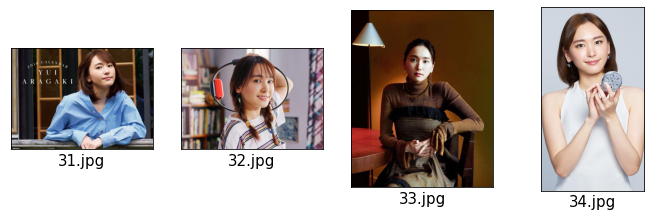

In [4]:
#@title 4.画像のアップロード
import os
import shutil
if os.path.isdir('pic'):
     shutil.rmtree('pic')
os.makedirs('pic', exist_ok=True)

from google.colab import files
uploaded = files.upload()
for file in uploaded:
  shutil.copy(file, 'pic/'+file)
  os.remove(file)

display_pic('pic')

In [5]:
#@title 6.画像をアニメに変換

# フォルダーリセット
import os
import shutil
if os.path.isdir('images'):
    shutil.rmtree('images')
os.makedirs('images', exist_ok=True)
if os.path.isdir('cartoonized_images'):
    shutil.rmtree('cartoonized_images')
os.makedirs('cartoonized_images', exist_ok=True)

# picフォルダーの指定したファイルをimagesフォルダーにコピー
input = '31.jpg' #@param {type:"string"}
shutil.copy('pic/'+input, 'images/'+input)

# images フォルダー内にある画像をアニメ画に変換しcartoonized_images フォルダーに保存する
from IPython.utils import io
import os
import subprocess
import tqdm.notebook
TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'
try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
         !python cartoonize.py
         pbar.update(100)
except subprocess.CalledProcessError:
  print(captured)
  raise

#アニメを表示
from google.colab.patches import cv2_imshow
import cv2
file = 'cartoonized_images/'+input
img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [6]:
#@title 7.画像のダウンロード
from google.colab import files
files.download('./cartoonized_images/'+input)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**------------ 動画でやってみよう ------------**

**fps取得を取得してffmpegでの動画作成に適用**\
**動画は短編が720以下が良い（アニメに変換すると短編720になるので）**\
**推奨HD（1280×720）**

In [7]:
#@title 8.動画をフレームにバラす
video_name = 'kasumi1.mp4' #@param {type:"string"}
video_file = 'video/'+video_name

import os
import shutil
import cv2

# flamesフォルダーリセット
if os.path.isdir('flames'):
    shutil.rmtree('flames')
os.makedirs('flames', exist_ok=True)
 
def video_2_images(video_file= video_file,   # ビデオの指定
                   image_dir='./flames/', 
                   image_file='%s.jpg'):  
 
    shutil.copy(video_file, 'input.mp4')  ####

    # Initial setting
    i = 0
    interval = 1
    length = 3000  # 最大フレーム数
    
    cap = cv2.VideoCapture(video_file)
    fps = cap.get(cv2.CAP_PROP_FPS)  # fps取得

    while(cap.isOpened()):
        flag, frame = cap.read()  
        if flag == False:  
                break
        if i == length*interval:
                break
        if i % interval == 0:    
           cv2.imwrite(image_dir+image_file % str(int(i/interval)).zfill(6), frame)
        i += 1 
    cap.release()
    return fps, i
 
fps, i = video_2_images()
print('fps = ', fps)
print('flames = ', i)
 

fps =  23.976023976023978
flames =  130


In [8]:
#@title 9.フレームをアニメに変換
# 既に cartoonized_imagesフォルダーがあれば削除
if os.path.isdir('cartoonized_flames'):
    shutil.rmtree('cartoonized_flames')

import warnings
warnings.simplefilter('ignore')

# flames フォルダー内にある静止画をアニメ画に変換し、cartoonized_flames フォルダーに保存する
!python cartoonize_movie.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Please use `layer.__call__` method instead.





2021-11-24 10:43:45.205999: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-11-24 10:43:45.206270: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5573e38f2f40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-24 10:43:45.206344: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-24 10:43:45.208472: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic l

**ffmpegに-loglevel error オプションを付けてログ停止**\
**$fpsで変数の中身を指定**\
**変換前動画から音声を取り出し付加**

In [9]:
#@title 10.アニメから動画を作成
# リセットファイル
if os.path.exists('./out.mp4'):
   os.remove('./out.mp4')

if os.path.exists('./input.mp3'):
   os.remove('./input.mp3')

if os.path.exists('./output.mp4'):
   os.remove('./output.mp4')

# アニメ画をmp4動画(output.mp4)に変換する
! ffmpeg -r $fps -i cartoonized_flames/%06d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4
! ffmpeg -i input.mp4 -vn -loglevel error input.mp3
! ffmpeg -i out.mp4 -i input.mp3 -loglevel error output.mp4

In [10]:
#@title 11.動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('./output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="80%" height="80%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [11]:
#@title 12.ビデオの縦連結
if os.path.exists('./output_renketsu.mp4'):
   os.remove('./output_renketsu.mp4')

! ffmpeg -i out.mp4 -i input.mp4 -filter_complex "vstack" -loglevel error output_renketsu.mp4

In [12]:
#@title 13.動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('./output_renketsu.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="80%" height="80%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")